<a href="https://colab.research.google.com/github/Sh2680/MML-/blob/main/basic_deep_learning_report_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Shilpa Tichkule**

**Roll no. : ugmr20230009**

# **Basic Deep Learning Report**

**Deep Learning**

Deep learning is a subfield of machine learning that utilizes artificial neural networks with multiple hidden layers. Deep neural networks are capable of learning complex, hierarchical representations of data, allowing them to excel at tasks like image recognition, natural language processing, and speech recognition.

**Pytorch**

PyTorch is a popular open-source machine learning library for Python, primarily used for building and training deep neural networks. It provides a powerful n-dimensional tensor library with GPU acceleration, automatic differentiation for efficient training, and a comprehensive set of neural network building blocks.

**Neural Network:**

Neural networks are a fundamental component of deep learning, consisting of interconnected nodes (neurons) that can learn to perform complex tasks by processing and transforming input data. These networks are inspired by the structure and function of the human brain, with multiple layers of neurons working together to extract increasingly abstract features from the input.


**Bias**

Bias refers to the error that is introduced by approximating a real-world problem with a simplified model.Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

**Variance:**

Variance refers to the error that is introduced by the model's sensitivity to small fluctuations in the training data. Variance measures how much the predictions for a given point vary between different realizations of the model. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting)

The key difference is that bias is an error due to incorrect assumptions in the model, while variance is an error due to the model's sensitivity to the training data.


**Multilayer Perceptron (MLP)**


An MLP is a type of feedforward neural network that consists of multiple layers of nodes, with each layer fully connected to the next one. The key components of an MLP are:


*   Input Layer: Receives the input data.
* Hidden Layer(s): Perform feature extraction and transformation
*  Output Layer: Produces the final predictions.


MLPs use activation functions to introduce non-linearity in the network. Common examples include:



*   ReLU (Rectified Linear Unit):  f(x)=max(0,x)
*   Sigmoid: f(x)= 1/1+e^-x
*   Tanh: f(x) = e^x - e^-x /e^x + e^-x


MLPs are trained using backpropagation, which involves:


*  Forward pass: Compute the output of the network.
*   Backward pass: Compute the gradients of the loss function with respect to the weights.
*   Update: Adjust the weights to minimize the loss.

torch.nn as nn: The module containing neural network components.

torch.optim as optim: The module for optimization algorithms.

from torchvision import datasets, transforms: Libraries for loading and transforming image datasets.

from torch.utils.data import DataLoader: Utility for loading datasets in batches.

here we have used the cifar -10 dataset.

100%|██████████| 170498071/170498071 [00:02<00:00, 57742218.08it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/10], Loss: 1.6391, Accuracy: 42.23%
Epoch [2/10], Loss: 1.4538, Accuracy: 49.33%
Epoch [3/10], Loss: 1.3744, Accuracy: 51.93%
Epoch [4/10], Loss: 1.3150, Accuracy: 53.92%
Epoch [5/10], Loss: 1.2648, Accuracy: 55.90%
Epoch [6/10], Loss: 1.2191, Accuracy: 57.35%
Epoch [7/10], Loss: 1.1794, Accuracy: 58.90%
Epoch [8/10], Loss: 1.1445, Accuracy: 60.31%
Epoch [9/10], Loss: 1.1120, Accuracy: 61.62%
Epoch [10/10], Loss: 1.0785, Accuracy: 62.45%


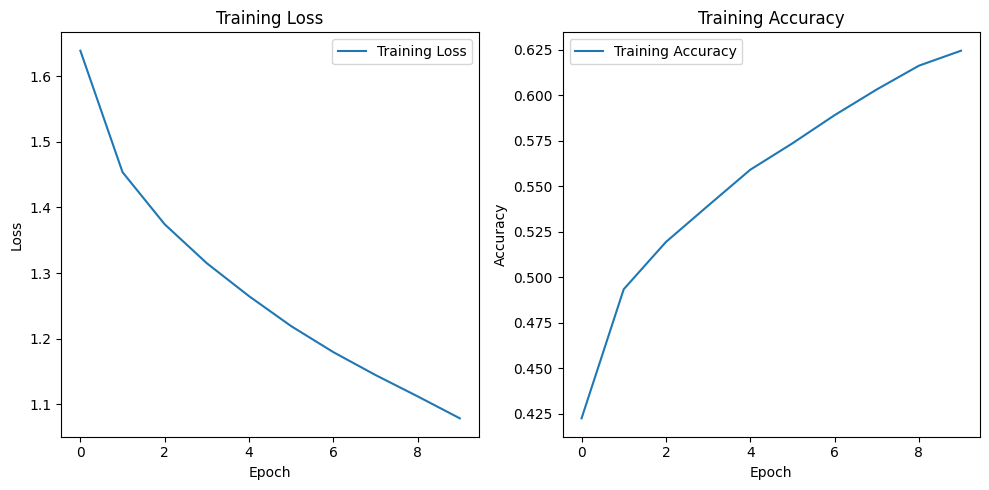

Accuracy on the test set: 50.93%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),           # convert images to pytorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

#  (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 output classes for CIFAR-10

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the MLP model
model = MLP()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store metrics for plotting
train_losses = []
train_accs = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    # Print statistics and update every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc * 100:.2f}%')

# Plotting training loss and accuracy
plt.figure(figsize=(10, 5))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plotting training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

**Deep Neural Networks (DNNs)**

DNNs are a class of MLPs with multiple hidden layers. They are capable of learning more complex, hierarchical representations of the input data. The increased depth allows DNNs to:

1.   Extract higher-level features.
2.  Perform better on complex task.

However, DNNs require more training data and computational resources.

**Back Propagation**

Backpropagation is the algorithm used to train MLPs and DNNs. It involves:


*   Computing the output of the network.
*   Computing the gradients of the loss function with respect to the weights.

*   Updating the weights to minimize the loss.



**Loss Functions**

Loss functions measure the error between the predicted and true outputs. Common examples include:

*  Mean Squared Error (MSE)
*    Cross-Entropy

**Activation Functions**

Activation functions are used to introduce non-linearity in the network. Common examples include:
*  ReLU
*   Sigmoid
*   Tanh

Epoch [1/10], Loss: 1.7598
Epoch [1/10], Loss: 1.8782
Epoch [1/10], Loss: 1.6212
Epoch [1/10], Loss: 1.4083
Epoch [1/10], Loss: 1.5761
Epoch [1/10], Loss: 1.4173


KeyboardInterrupt: 

In [4]:
# define DNN model
class SimpleDNN(nn.Module):
    def __init__(self):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleDNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with plotting
train_losses = []

total_steps = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
      # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Record and plot the average loss for the epoch
    train_losses.append(running_loss / len(train_loader))
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

Epoch [1/10], Loss: 1.6930
Epoch [1/10], Loss: 1.5710
Epoch [1/10], Loss: 1.5639
Epoch [1/10], Loss: 1.4742
Epoch [1/10], Loss: 1.5203
Epoch [1/10], Loss: 1.6391
Epoch [1/10], Loss: 1.5035
Epoch [1/10], Loss: 1.6328
Epoch [2/10], Loss: 1.4566
Epoch [2/10], Loss: 1.2901
Epoch [2/10], Loss: 1.2211
Epoch [2/10], Loss: 1.5127
Epoch [2/10], Loss: 1.2554
Epoch [2/10], Loss: 1.1774
Epoch [2/10], Loss: 1.3533
Epoch [2/10], Loss: 1.4222
Epoch [3/10], Loss: 1.2103
Epoch [3/10], Loss: 1.3269
Epoch [3/10], Loss: 1.3526
Epoch [3/10], Loss: 1.4308
Epoch [3/10], Loss: 1.2333
Epoch [3/10], Loss: 1.3662
Epoch [3/10], Loss: 1.4472
Epoch [3/10], Loss: 1.3142
Epoch [4/10], Loss: 1.1002
Epoch [4/10], Loss: 1.0444
Epoch [4/10], Loss: 1.2282
Epoch [4/10], Loss: 1.2107
Epoch [4/10], Loss: 1.3657
Epoch [4/10], Loss: 1.2443
Epoch [4/10], Loss: 1.4022
Epoch [4/10], Loss: 1.2265
Epoch [5/10], Loss: 0.9757
Epoch [5/10], Loss: 1.0492
Epoch [5/10], Loss: 1.3270
Epoch [5/10], Loss: 1.2153
Epoch [5/10], Loss: 1.2559
E

**Regularization**

Regularization techniques are used to prevent overfitting, which occurs when a model becomes too specialized to the training data and fails to generalize well to new data. Common regularization methods include:

*   L1 Regularization: Adds a penalty term to the loss function proportional to the sum of the absolute values of the weights.

*   L2 Regularization: Adds a penalty term to the loss function proportional to the sum of the squares of the weights.
*   Dropout: Randomly drops neurons during training to prevent co-adaptation.

**Convolutional Neural Networks (CNNs)**

CNNs are specialized neural networks designed for processing grid-like data, such as images. They leverage the spatial structure of the input through the use of convolutional layers. Key components of CNNs include:
*   Convolutional Layers: Apply a set of learnable filters to the input.
*   Pooling Layers: Reduce the spatial size of the representation.
*   Fully Connected Layers: Perform classification based on the extracted features.

CNNs are widely used for image recognition, object detection, and other computer vision tasks.

Epoch [1/10], Step [100/782], Loss: 1.6420
Epoch [1/10], Step [200/782], Loss: 1.4477
Epoch [1/10], Step [300/782], Loss: 1.3252
Epoch [1/10], Step [400/782], Loss: 1.2824
Epoch [1/10], Step [500/782], Loss: 1.2267
Epoch [1/10], Step [600/782], Loss: 1.3284
Epoch [1/10], Step [700/782], Loss: 1.0727
Epoch [2/10], Step [100/782], Loss: 1.2362
Epoch [2/10], Step [200/782], Loss: 1.0261
Epoch [2/10], Step [300/782], Loss: 1.4424
Epoch [2/10], Step [400/782], Loss: 1.0494
Epoch [2/10], Step [500/782], Loss: 1.0662
Epoch [2/10], Step [600/782], Loss: 1.1040
Epoch [2/10], Step [700/782], Loss: 1.0164
Epoch [3/10], Step [100/782], Loss: 0.8785
Epoch [3/10], Step [200/782], Loss: 1.0585
Epoch [3/10], Step [300/782], Loss: 0.8026
Epoch [3/10], Step [400/782], Loss: 1.0344
Epoch [3/10], Step [500/782], Loss: 0.8597
Epoch [3/10], Step [600/782], Loss: 0.7506
Epoch [3/10], Step [700/782], Loss: 0.7964
Epoch [4/10], Step [100/782], Loss: 0.6634
Epoch [4/10], Step [200/782], Loss: 1.0915
Epoch [4/10

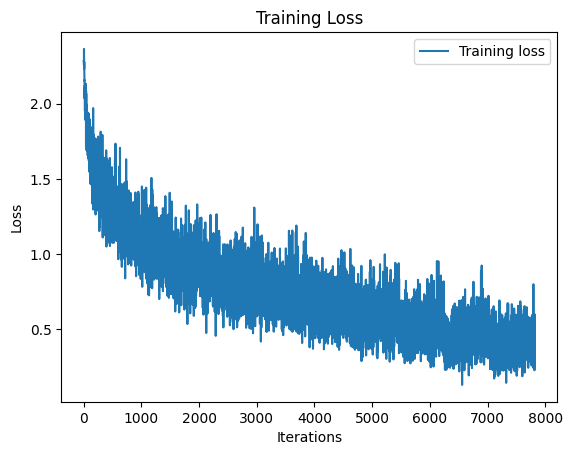

Accuracy of the network on the 10000 test images: 69.79%


In [5]:
#define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CNN model definition
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten the tensor for fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []

total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

        train_losses.append(loss.item())

# Plot the training loss over epochs
plt.plot(train_losses, label='Training loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

**Recurrent Neural Networks (RNNs**)

RNNs are a class of neural networks designed to process sequential data, such as text or time series. They maintain an internal state that allows them to exhibit dynamic temporal behavior. Key aspects of RNNs include:
*   Ability to Process Inputs of Variable Length: RNNs can handle inputs of different lengths.
*   Maintain a "Memory" of Previous Inputs: RNNs keep a memory of previous inputs through their internal state.
*   Examples: Vanilla RNNs, Long Short-Term Memory (LSTMs), Gated Recurrent Units (GRUs).

RNNs are used for tasks like language modeling, machine translation, and speech recognition.


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Step [100/782], Loss: 1.9906
Epoch [1/10], Step [200/782], Loss: 2.0411
Epoch [1/10], Step [300/782], Loss: 1.7553
Epoch [1/10], Step [400/782], Loss: 1.9249
Epoch [1/10], Step [500/782], Loss: 1.9703
Epoch [1/10], Step [600/782], Loss: 1.8669
Epoch [1/10], Step [700/782], Loss: 1.6636
Epoch [2/10], Step [100/782], Loss: 1.7935
Epoch [2/10], Step [200/782], Loss: 1.9300
Epoch [2/10], Step [300/782], Loss: 1.8315
Epoch [2/10], Step [400/782], Loss: 1.6024
Epoch [2/10], Step [500/782], Loss: 1.7378
Epoch [2/10], Step [600/782], Loss: 1.8636
Epoch [2/10], Step [700/782], Loss: 1.9038
Epoch [3/10], Step [100/782], Loss: 1.5442
Epoch [3/10], Step [200/782], Loss: 1.9826
Epoch [3/10], Step [300/782], Loss: 1.4935
Epoch [3/10], Step [400/782], Loss: 1.6360
Epoch [3/10], Step [500/782], Loss: 1.8020
Epoch [3/10], Step [600/782], Loss: 1.6703
Epoch [3/10], Step [700/782], Loss: 1.6794
Epoch [4/10], Step [1

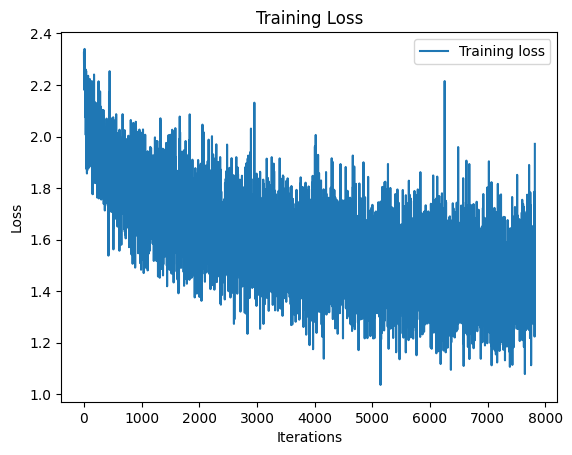

Accuracy of the network on the 10000 test images: 45.48%


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# RNN model definition
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Initialize model, optimizer, and loss function
input_size = 32 * 3  # 32x32 image with 3 color channels (flattened)
hidden_size = 128
num_layers = 1  # Keep it simple for CIFAR-10
num_classes = 10

model = SimpleRNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
train_losses = []

total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 32, 32 * 3).to(device)  # Reshape images to (batch_size, seq_len, input_size)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

        train_losses.append(loss.item())

# Plot the training loss over epochs
plt.plot(train_losses, label='Training loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 32, 32 * 3).to(device)  # Reshape images to (batch_size, seq_len, input_size)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

**Transformers**

Transformers are a type of neural network architecture that has become increasingly popular, particularly in natural language processing (NLP) tasks. They use attention mechanisms to capture long-range dependencies in the input data. Key features of Transformers include:

*   Attention-Based Mechanism: Weights different parts of the input.
*  Ability to Process Inputs of Variable Length: Transformers can handle inputs of different lengths.
*   Parallelizable Training and Inference: Unlike sequential processing in RNNs, Transformers can be trained and inferred in parallel.

Transformers have achieved state-of-the-art performance on a wide range of NLP tasks, such as language translation, text generation, and question answering.

In [6]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TextClassificationPipeline

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Create a text classification pipeline
pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, framework='pt')

# Example text
texts = [
    "I love this movie! It's fantastic.",
    "This is the worst book I've ever read."
]

# Classify the texts
predictions = pipeline(texts)

# Print the predictions
for text, prediction in zip(texts, predictions):
    label = prediction['label']
    score = prediction['score']
    print(f"Text: {text}\nLabel: {label}, Score: {score:.4f}\n")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: I love this movie! It's fantastic.
Label: LABEL_0, Score: 0.5814

Text: This is the worst book I've ever read.
Label: LABEL_0, Score: 0.5666

